# Customer Segmentation System

Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group.

Why should this segmentation be done correctly? Grouping people correctly increases the probability of the customer to buy the product, and putting it wrong decreases it. think of customer behavior like playing tennis, taking the subway, etc. For example, if we show special ads to those who take the subway, it will work for our benefit.

# Exploratory Data Analysis(EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [99]:
# imports
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import iqr
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [100]:
df = pd.read_csv("customers_dataset.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [101]:
df.shape

(2240, 29)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [103]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [104]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [105]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

# Year Birth

We need to convert year birth to an age feature.

In [106]:
from datetime import datetime
df["Age"] = df["Year_Birth"].apply(lambda x : datetime.now().year - x)
df["Age"].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [107]:
df["TotalAmountSpent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64

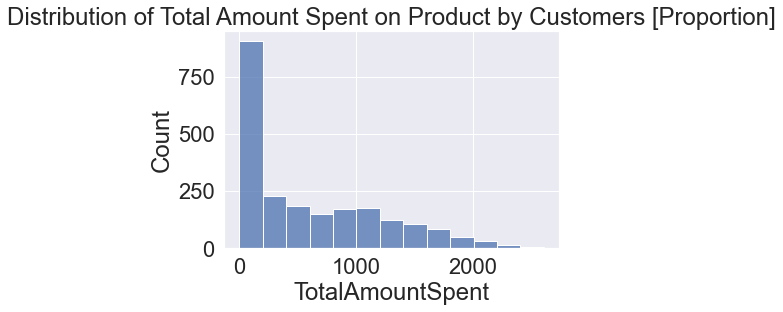

In [108]:
sns.histplot(data=df, x="TotalAmountSpent", binwidth=200, stat="count")
plt.title("Distribution of Total Amount Spent on Product by Customers [Proportion]");

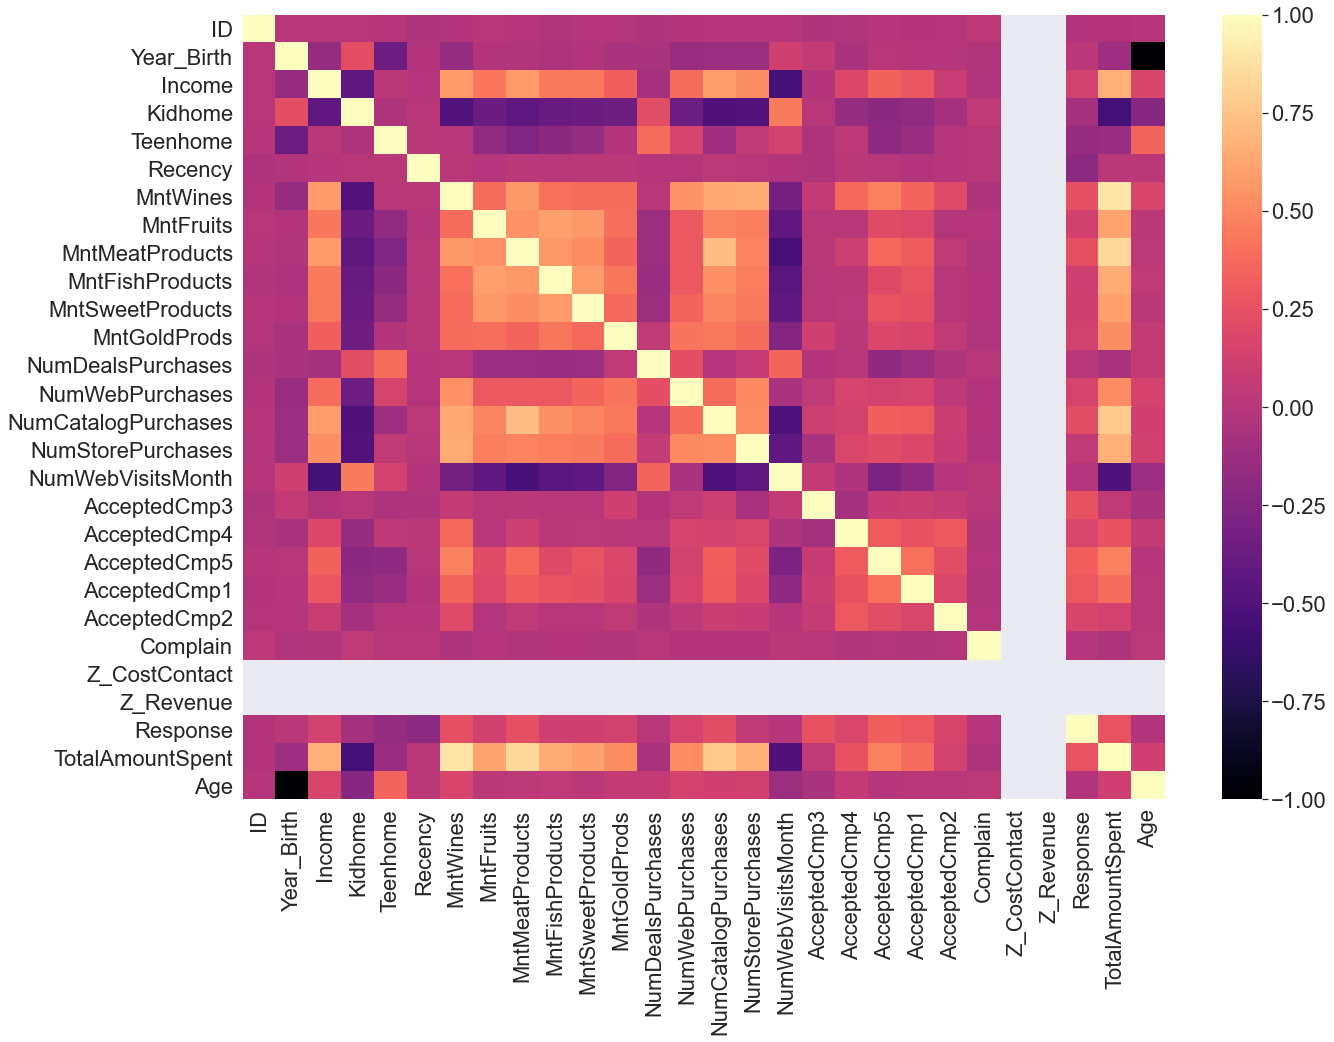

In [109]:
cor = df.corr()
sns.set(font_scale=2.0)
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=False, cmap='magma')
plt.tight_layout()
plt.show()

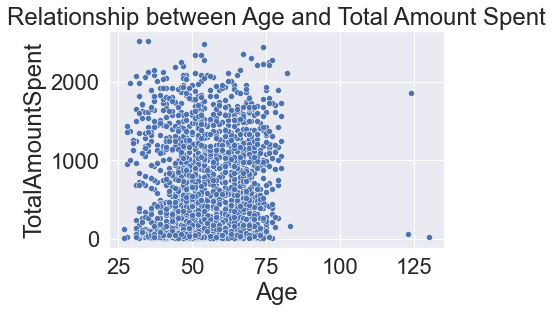

In [110]:
sns.scatterplot(data=df, x="Age", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent");

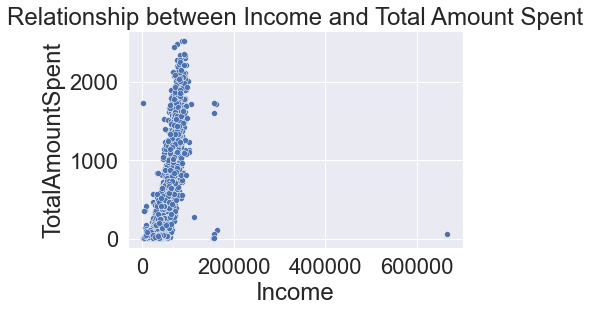

In [111]:
sns.scatterplot(data=df, x="Income", y="TotalAmountSpent")
plt.title("Relationship between Income and Total Amount Spent");

In [112]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [113]:
df["Age Group"] =df["Age"].apply(group_age)

# To order plotly index
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]



In [114]:
df_cut = df[df["Income"].between(low, high)]

In [115]:
mask = df_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + ' Rs.',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

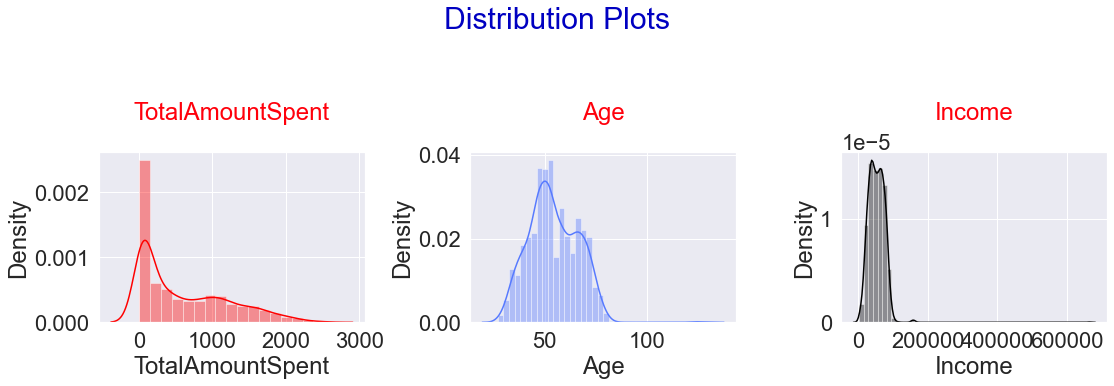

In [116]:
# -Distribution Plots-

plt.figure(figsize=(16,12),facecolor='white')

# Spending Score
plt.subplot(3,3,1)
plt.title('TotalAmountSpent\n', color='#FF000B')
sns.distplot(df['TotalAmountSpent'], color='red')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#FF000B')
sns.distplot(df['Age'], color='#577AFF')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Income\n', color='#FF000B')
sns.distplot(df['Income'], color='black')

plt.suptitle('Distribution Plots\n', color='#0000C1', size = 30)
plt.tight_layout()

# Multivariate Analysis
 
Education Vs Income Vs TotalAmountSpent

In [117]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

# Building our Model(Kmeans)

We will build the Kmeans Model using two Features to Segment the Customers Demographic and Behaviour "Income" and "Total Amount Spent"

In [118]:
df["Income"].fillna(df["Income"].median(), inplace=True)
data = df[["Income", "TotalAmountSpent"]]
df_log = np.log(data)

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [120]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

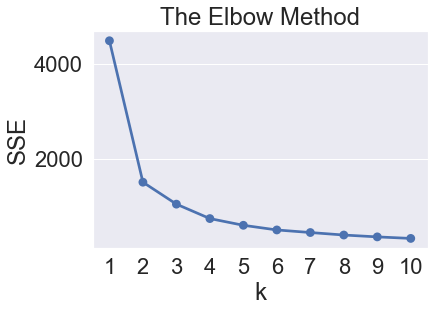

In [121]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

# We will use Knee Locator to determine Optimal Cluster

In [122]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 2


In [139]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=2, random_state=42)

In [140]:
data = data.assign(ClusterLabel= model.labels_)

In [141]:
data.groupby("ClusterLabel")[["Income", "TotalAmountSpent"]].median()

,Income,TotalAmountSpent
ClusterLabel,,
0,32363.5,56
1,65158.5,928


In [142]:
fig = px.scatter(
    data_frame=data,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

- Cluster 0: Customers with low Income and Low spending.
- Cluster 1: Customer with moderate Income and Moderate spending.


# - Building The Kmeans Model with Three Features

In [ ]:
 data = df[["Age", "Income", "TotalAmountSpent"]]

In [159]:
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)



In [160]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

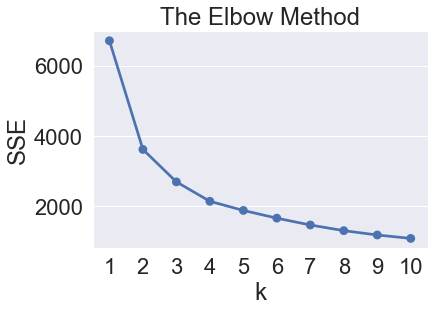

In [161]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [162]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)


data = data.assign(ClusterLabel= model.labels_)

In [163]:
result = data.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "TotalAmountSpent":"median"}).round()
result

,Age,Income,TotalAmountSpent
ClusterLabel,,,
0,50.0,31801.0,54.0
1,66.0,62814.0,822.0
2,45.0,67402.0,1001.0


# Visualizing The Result

In [164]:
fig = px.scatter_3d(data_frame=data, x="Income", 
                    y="TotalAmountSpent", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()

From above visual graphical representation,we can say that-

- Cluster 1 depicts young customers that earn way lot and also spend a lot.
- Cluster 2 translates to old customer that earn lot and also spend high.
- Cluster 3 depicts young customers that earn lows and also spend low.